In [301]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import math

#  Section1: Business Unerstanding

# Section2: Data Understanding

In [271]:
#os.mkdir('Udacity')

In [272]:
os.chdir('C:/Users/actua/Documents/Udacity/')

In [273]:
df=pd.read_csv('kaggle_survey_2020_responses.csv');

C:\Users\actua\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [274]:
df=df.iloc[1:,:] 

In [373]:
df.head(5)

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
1,1838,35-39,Man,Colombia,Doctoral degree,Student,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN
2,289287,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,860,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
4,507,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,78,30-34,Man,Japan,Master’s degree,Software Engineer,3-5 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [275]:
df.shape

(20036, 355)

In [276]:
#Missing values exist
df[["Q1","Q2","Q3","Q24"]].info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20036 entries, 1 to 20036
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Q1      20036 non-null  object
 1   Q2      20036 non-null  object
 2   Q3      20036 non-null  object
 3   Q24     10729 non-null  object
dtypes: object(4)
memory usage: 626.3+ KB


In [277]:
#miss values exist 
df[[i for i  in df.columns if 'Q7' in i]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20036 entries, 1 to 20036
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Q7_Part_1   15530 non-null  object
 1   Q7_Part_2   4277 non-null   object
 2   Q7_Part_3   7535 non-null   object
 3   Q7_Part_4   3315 non-null   object
 4   Q7_Part_5   3827 non-null   object
 5   Q7_Part_6   3367 non-null   object
 6   Q7_Part_7   2995 non-null   object
 7   Q7_Part_8   262 non-null    object
 8   Q7_Part_9   198 non-null    object
 9   Q7_Part_10  1776 non-null   object
 10  Q7_Part_11  2217 non-null   object
 11  Q7_Part_12  206 non-null    object
 12  Q7_OTHER    1945 non-null   object
dtypes: object(13)
memory usage: 2.0+ MB


In [278]:
#missing value
df[[i for i  in df.columns if 'Q23' in i]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20036 entries, 1 to 20036
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Q23_Part_1  6421 non-null   object
 1   Q23_Part_2  3320 non-null   object
 2   Q23_Part_3  4007 non-null   object
 3   Q23_Part_4  2725 non-null   object
 4   Q23_Part_5  3119 non-null   object
 5   Q23_Part_6  2339 non-null   object
 6   Q23_Part_7  1753 non-null   object
 7   Q23_OTHER   522 non-null    object
dtypes: object(8)
memory usage: 1.2+ MB


# Section3: Data Preparation


In [279]:
df.Q24.isnull().sum()

9307

In [420]:
#No need to remove the miss values because the value_counts() method is aggregates the data
df.Q24.value_counts().sort_index()

$0-999             2128
1,000-1,999         581
10,000-14,999       665
100,000-124,999     573
125,000-149,999     315
15,000-19,999       449
150,000-199,999     347
2,000-2,999         330
20,000-24,999       404
200,000-249,999     115
25,000-29,999       310
250,000-299,999      48
3,000-3,999         264
30,000-39,999       540
300,000-500,000      55
4,000-4,999         279
40,000-49,999       552
5,000-7,499         488
50,000-59,999       510
60,000-69,999       408
7,500-9,999         371
70,000-79,999       394
80,000-89,999       273
90,000-99,999       280
> $500,000           50
Name: Q24, dtype: int64

In [281]:
df.Q1.value_counts().isnull().sum()

0

# Section4:   Model&Evaluation

In [200]:
#preparing the data Q1

def select_ques(data):
    '''
    Agregate values  of specific columns 
    input:   columns of dataframe
    output:  Agregated value 
    
    '''
    v=data.value_counts().sort_index() 
    return pd.DataFrame(v)
     

In [201]:
ques_1=select_ques(df['Q1']) 

In [202]:
#ques_1['Q1']

# Question1: What is the age distribution of Data Scientists?

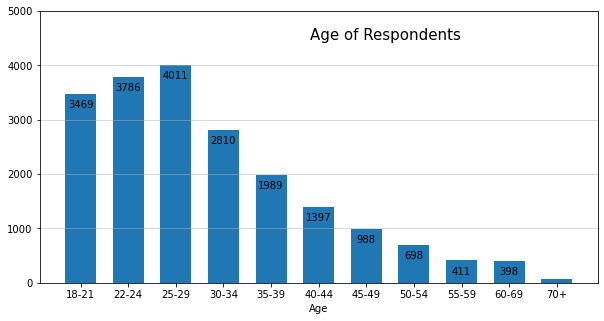

In [374]:
#Model
def annotation(ques_1): 
    '''
Annotates a bar chart for question one

Input:  Agregated data 
output: Annotated bar chart

''' 
    
    fig,ax=plt.subplots(1,1,figsize=(10,5))
    ax.bar(ques_1.index,ques_1['Q1'],width=.65);

    for z in ques_1.index:
        ax.annotate('{}'.format(ques_1['Q1'][z]),xy=(z,ques_1['Q1'][z]-200),va='center',ha='center')
    
    ax.set_ylim(0,5000)
    ax.grid(axis='y',alpha=.6)
    fig.text(0.5,0.8,'Age of Respondents',fontsize=15,fontfamily='sans-serif');
    ax.set_xlabel('Age')
    plt.show()
    return 
    
annotate_q1=annotation(ques_1);




In [204]:
#data preparation
def select_q1q2(quesot):
    '''
    imput: columns: Q1&Q2
    Output:
    1.Group the age of the respondents by  gender and count the amount of male vs female
    2. unstack the data where each gender become a column

    '''     
    v= df.groupby(['Q2'])['Q1'].value_counts().unstack()
    return pd.DataFrame(v)





In [205]:
q_1_2=select_q1q2

In [375]:
#model
def Questions_1_2(q_1_2): 
    
    '''

    Imput: dataframe
    Output: Display age by gender

    '''
    
    q_1_2=select_q1q2(df)
    Male=q_1_2.loc['Man']
    Female=q_1_2.loc['Woman']
    fig,ax=plt.subplots(1,1,figsize=(15,6))
    ax.bar(Male.index,Male,label='Male');
    ax.bar(Female.index,Female,label='Female');
    
    
    for a in Male.index:
        ax.annotate('{:3.0f}'.format(Male[a]),xy=(a,Male[a]+300),va='center',ha='center')
    for a in Male.index:
        ax.annotate('{:3.0f}'.format(Female[a]),xy=(a,Female[a]+100),va='center',ha='center')
        
    ax.set_ylim(0,5000)
    ax.legend()
    ax.grid(axis='y',alpha=.6)
    ax.set_xlabel('Age')
    plt.show()
    return





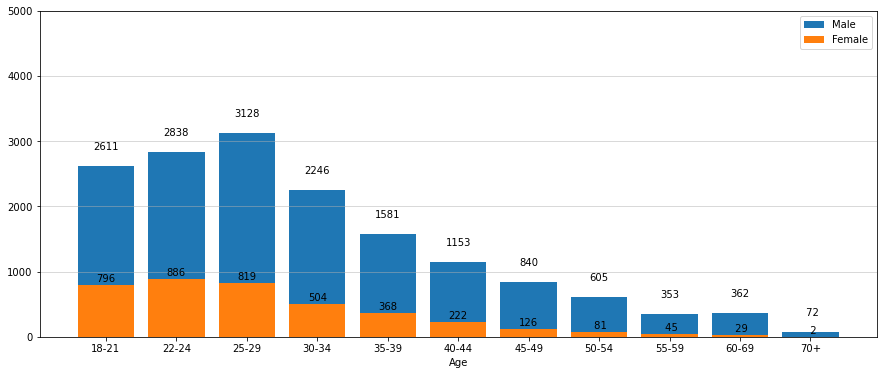

In [376]:
Age_and_gendeer=Questions_1_2(q_1_2)

# Question2: How to get started in Data Science field?

In [392]:

def Question_37(df):
    '''
    1. Filter columns for Q37 using list comprehension
    2. Create a serie to process the data




    input: The dataframe
    output: Aggregated data of the selected columns


    '''
    quest37= df[[y for y in df.columns if "Q37" in y]]
    c=pd.Series(dtype='int')
    
    for j in quest37.columns:
           c[quest37[j].value_counts().index[0]]=quest37[j].count()
            
    fig,ax=plt.subplots(1,1,figsize=(15,6))
    ax.bar(c.index,c);
    ax.set_xticklabels(c.rename(index={'LinkedIn Learning':'LinkedIn',
                   'Cloud-certification programs (direct from AWS, Azure, GCP, or similar)':'Cloud Cerfication',
                    'University Courses (resulting in a university degree)':'University Degree'}).index,rotation=90);

    plt.show()
    
    return



<ipython-input-392-b18d59423091>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(c.rename(index={'LinkedIn Learning':'LinkedIn',


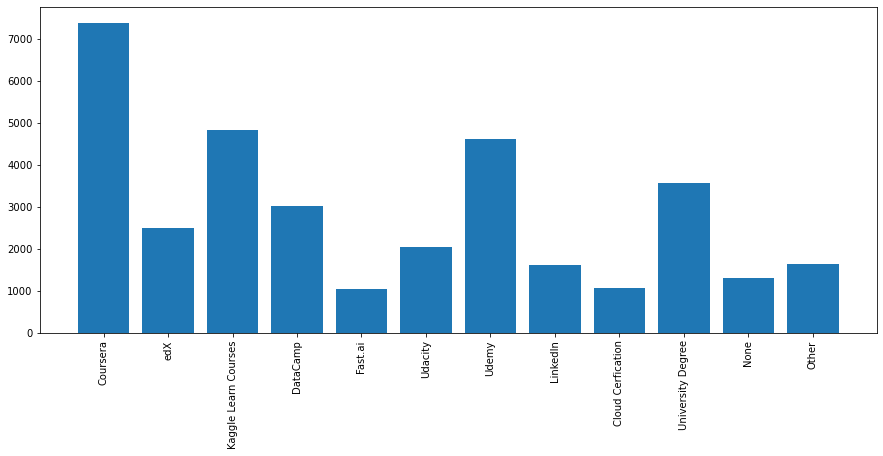

In [393]:
graph=Question_37(df);

In [394]:
quest37= df[[y for y in df.columns if "Q37" in y]]
c=pd.Series(dtype='int')
    
for j in quest37.columns:
    c[quest37[j].value_counts().index[0]]=quest37[j].count()
per=(c/df.shape[0])*100
print('{0}'.format(np.round(per,2)))

Coursera                                                                  36.84
edX                                                                       12.47
Kaggle Learn Courses                                                      24.17
DataCamp                                                                  15.13
Fast.ai                                                                    5.28
Udacity                                                                   10.26
Udemy                                                                     23.09
LinkedIn Learning                                                          8.07
Cloud-certification programs (direct from AWS, Azure, GCP, or similar)     5.37
University Courses (resulting in a university degree)                     17.81
None                                                                       6.52
Other                                                                      8.17
dtype: float64


# Question3: What are the programming languages used by Data Scientist?

In [351]:
def Question_7(df):
    '''
    1. Filter columns for Q7 using list comprehension
    2. Create a serie to process the data




    input: The dataframe
    output: Aggregated data of the selected columns


    '''
    quest7= df[[y for y in df.columns if "Q7" in y]]
    c=pd.Series(dtype='int')
    
    for j in quest7.columns:
           c[quest7[j].value_counts().index[0]]=quest7[j].count()
            
    fig,ax=plt.subplots(1,1,figsize=(15,6))
    ax.bar(c.index,c);
    ax.set_xticklabels(c.index,rotation=90);
    ax.set_xlabel('Programming  Languages')
    ax.set_ylabel('Number of Respondents')
    ax.set_title('Programming Languages Used by Data Scientist')
    plt.show()
    
    return




<ipython-input-351-ec723d2f4216>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(c.index,rotation=90);


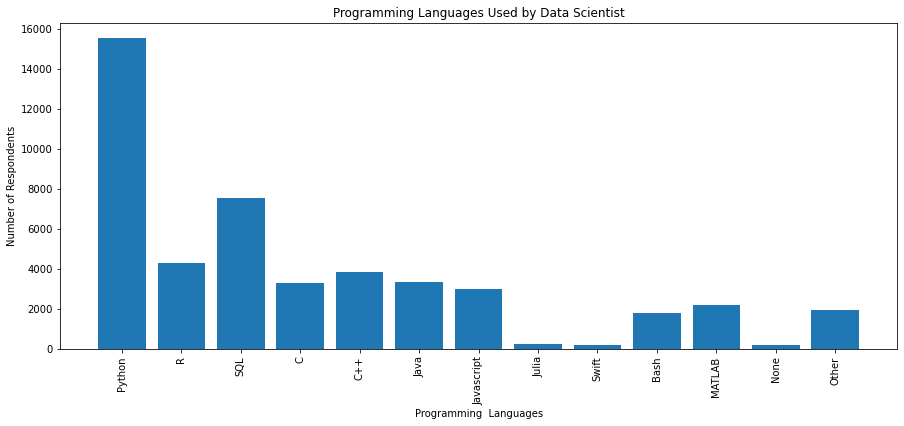

In [352]:
graph_7=Question_7(df);

In [318]:

quest7= df[[y for y in df.columns if "Q7" in y]]
c=pd.Series(dtype='int')
    
for j in quest7.columns:
    c[quest7[j].value_counts().index[0]]=quest7[j].count()
percentage=(((c/df.shape[0])*100))
print( '{0}'.format(np.round(percentage,2)))

Python        77.51
R             21.35
SQL           37.61
C             16.55
C++           19.10
Java          16.80
Javascript    14.95
Julia          1.31
Swift          0.99
Bash           8.86
MATLAB        11.07
None           1.03
Other          9.71
dtype: float64


# Question4:

# What is the salary distribution of Data Scientist in Canada & The   United States of America

In [431]:
 def Salary(df):
    '''
    Group salary by country
    Display salary of the selected country
    Imput: dataframe

    '''
    v=df.groupby(['Q3'])['Q24'].value_counts()
    Canada=v.loc['Canada']
    USA=v.loc['United States of America']
    fig,ax=plt.subplots(1,1,figsize=(15,6))
    ax.bar(USA.index,USA,label='USA')
    ax.bar(Canada.index,Canada,label='Canada')

    ax.set_xticklabels(USA.index,rotation=80);
    ax.set_xlabel('Salary of Data Scientist')
    ax.legend();
    return





<ipython-input-431-8251b92f0e17>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(USA.index,rotation=80);


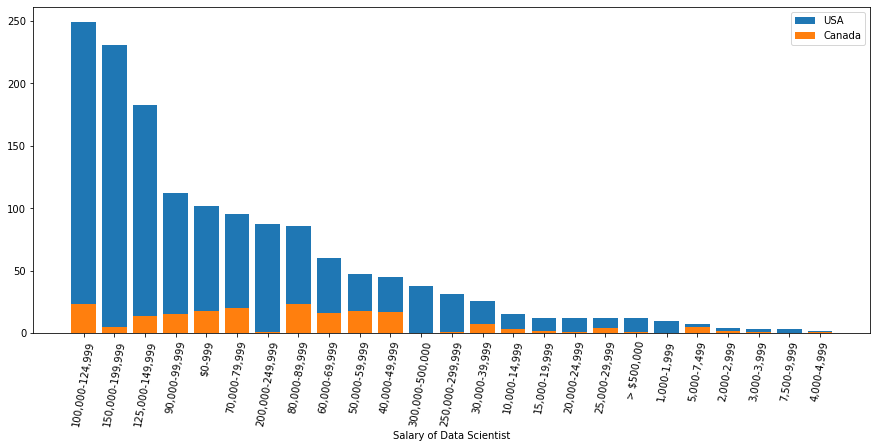

In [432]:
graph_q25_q3=Salary(df);

In [414]:
def Question23(df):
    '''
    1. Filter columns for Q23 using list comprehension
    2. Create a serie to process the data



    input: The dataframe
    output: Aggregated data of the selected columns


    '''
    q23=df[[i for i in df.columns if 'Q23' in i ]]
    t=pd.Series(dtype='int')
    for i in q23.columns:
        t[q23[i].value_counts().index[0]]=q23[i].count()
    
    
    fig,ax=plt.subplots(1,1,figsize=(15,6))
    ax.bar(['A','B','C','D','E','F','G','H'],t);
    ax.set_xticklabels(['A','B','C','D','E','F','G','H'],rotation=360);
    l=['A','B','C','D','E','F','G','H']
    ax.set_xlabel('Data Science Task')
    print('{} {}'.format([i for i in l][0],[z for z in t.index][0]))
    print('{} {}'.format([i for i in l][1],[z for z in t.index][1]))
    print('{} {}'.format([i for i in l][2],[z for z in t.index][2]))
    print('{} {}'.format([i for i in l][3],[z for z in t.index][3]))
    print('{} {}'.format([i for i in l][4],[z for z in t.index][4]))
    print('{} {}'.format([i for i in l][5],[z for z in t.index][5]))
    print('{} {}'.format([i for i in l][6],[z for z in t.index][6]))
    print('{} {}'.format([i for i in l][7],[z for z in t.index][7]))
    return






A Analyze and understand data to influence product or business decisions
B Build and/or run the data infrastructure that my business uses for storing, analyzing, and operationalizing data
C Build prototypes to explore applying machine learning to new areas
D Build and/or run a machine learning service that operationally improves my product or workflows
E Experimentation and iteration to improve existing ML models
F Do research that advances the state of the art of machine learning
G None of these activities are an important part of my role at work
H Other


<ipython-input-400-a2484d4b3608>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['A','B','C','D','E','F','G','H'],rotation=360);


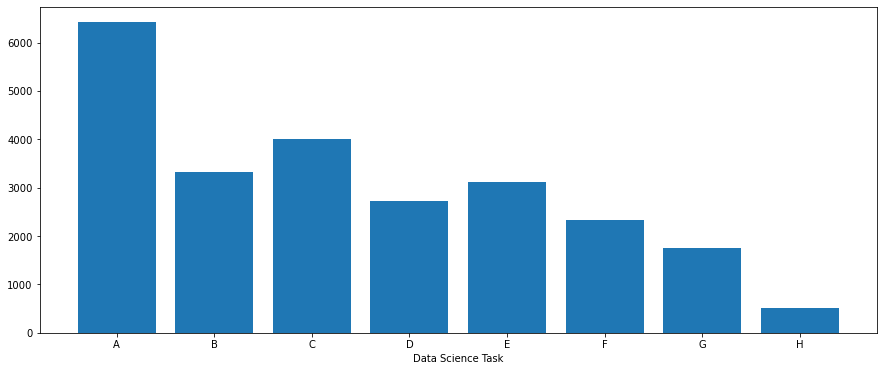

In [401]:
Task=Question23(df);